In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [7]:
df=pd.read_csv('Data1.txt',sep='\s+',header=None)
df=pd.DataFrame(df)

In [8]:
df=pd.read_csv('Data1.txt',sep='\s+',header=None)
df=pd.DataFrame(df)
t = df[df.columns[0]]
s1 = df[df.columns[1]] - 1.3
s2 = df[df.columns[2]]
S3 = df[df.columns[3]]
fs = 1/0.001
N = len(df.index)



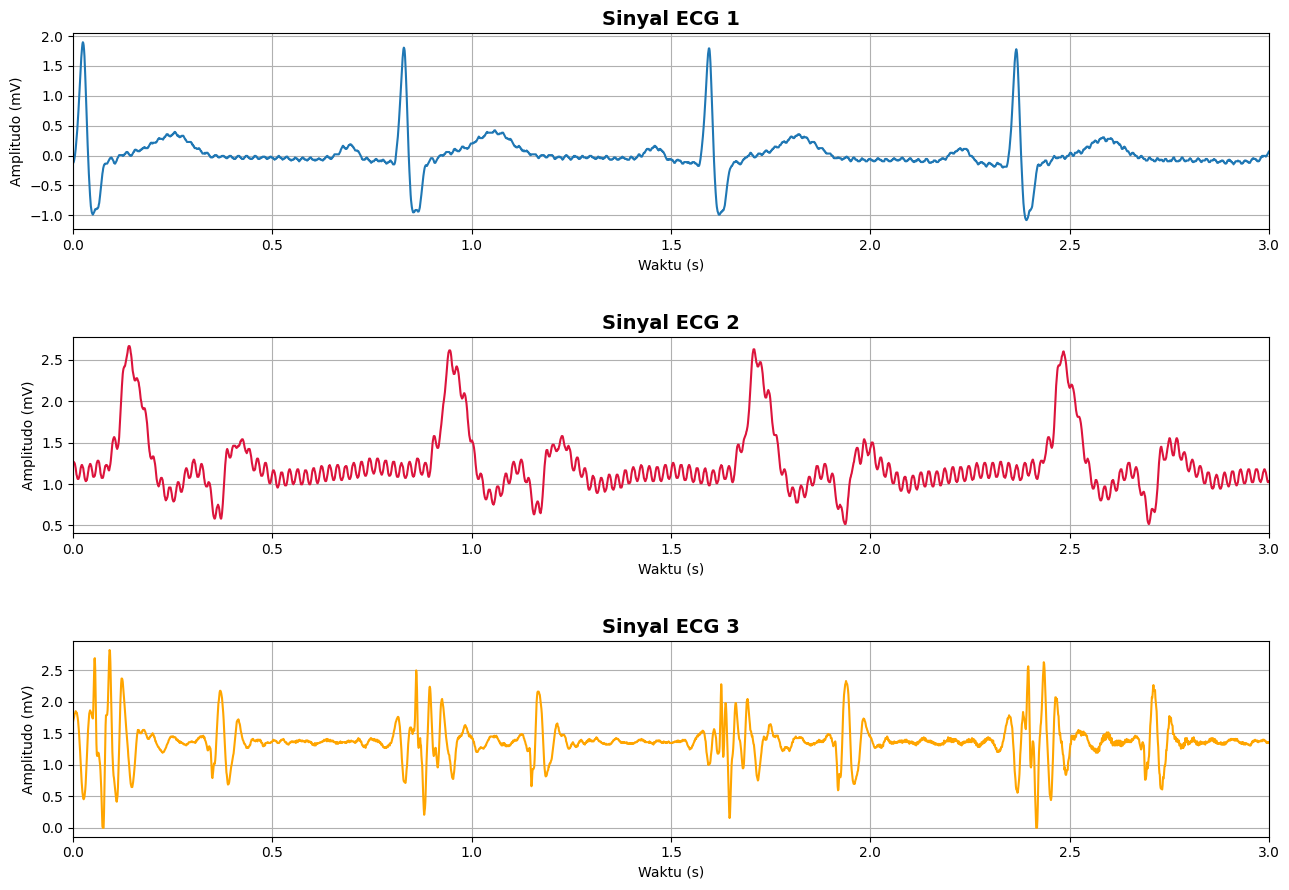

In [9]:
fig, axs = plt.subplots(3, figsize=(13,9))
axs[0].plot(t*0.001,s1)
axs[0].set_title('Sinyal ECG 1',fontweight="bold", size=14)
axs[1].plot(t*0.001,s2,'crimson')
axs[1].set_title('Sinyal ECG 2',fontweight="bold", size=14)
axs[2].plot(t*0.001,S3,'orange')
axs[2].set_title('Sinyal ECG 3',fontweight="bold", size=14)
for ax in axs.flat:
    ax.set(xlabel='Waktu (s)',ylabel='Amplitudo (mV)', xlim=(0,3))
    ax.grid()
fig.tight_layout(h_pad=3)

FFT :


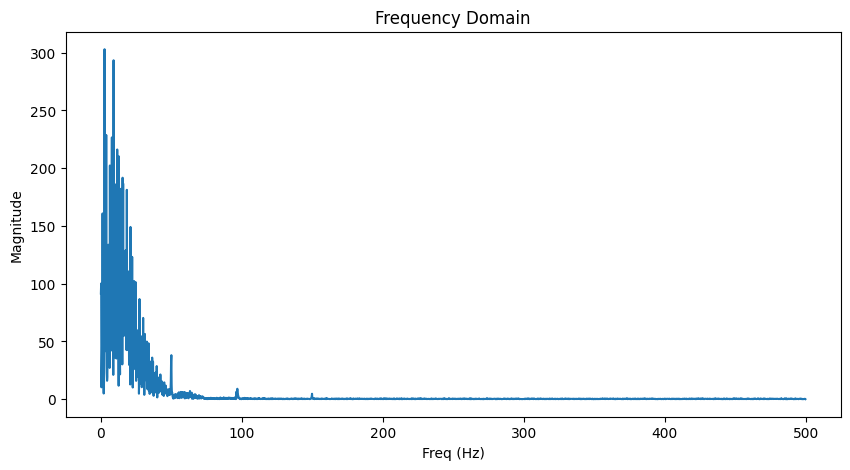

In [10]:
#FFT 
real_odd = np.zeros(round(N/2))
im_odd = np.zeros(round(N/2))
real_eve = np.zeros(round(N/2))
im_eve = np.zeros(round(N/2))
MagDFT = np.zeros(round(N/2))
for k in range(round(N/2)):
    for n in range(round(N/2)):
        real_odd[k] += s1[2*n]*np.cos(2*np.pi*k*2*n/N)
        im_odd[k] -= s1[2*n]*np.sin(2*np.pi*k*2*n/N)
        real_eve[k] += s1[2*n+1]*np.cos(2*np.pi*k*(2*n+1)/N)
        im_eve[k] -= s1[2*n+1]*np.sin(2*np.pi*k*(2*n+1)/N)
        X_real = real_odd[k] + real_eve[k]
        X_imaj = im_eve[k] + im_odd[k]
        MagDFT[k] = np.sqrt(np.square(X_real) + np.square(X_imaj)) 


n = np.arange(0,N/2,1,dtype=int)
k = np.arange(0,N/2,1,dtype=int)


print('FFT :')
plt.figure(figsize=((10,5)))
plt.plot(k*fs/N, MagDFT[k])
plt.xlabel("Freq (Hz)")
plt.ylabel("Magnitude")
plt.title("Frequency Domain")
plt.show()


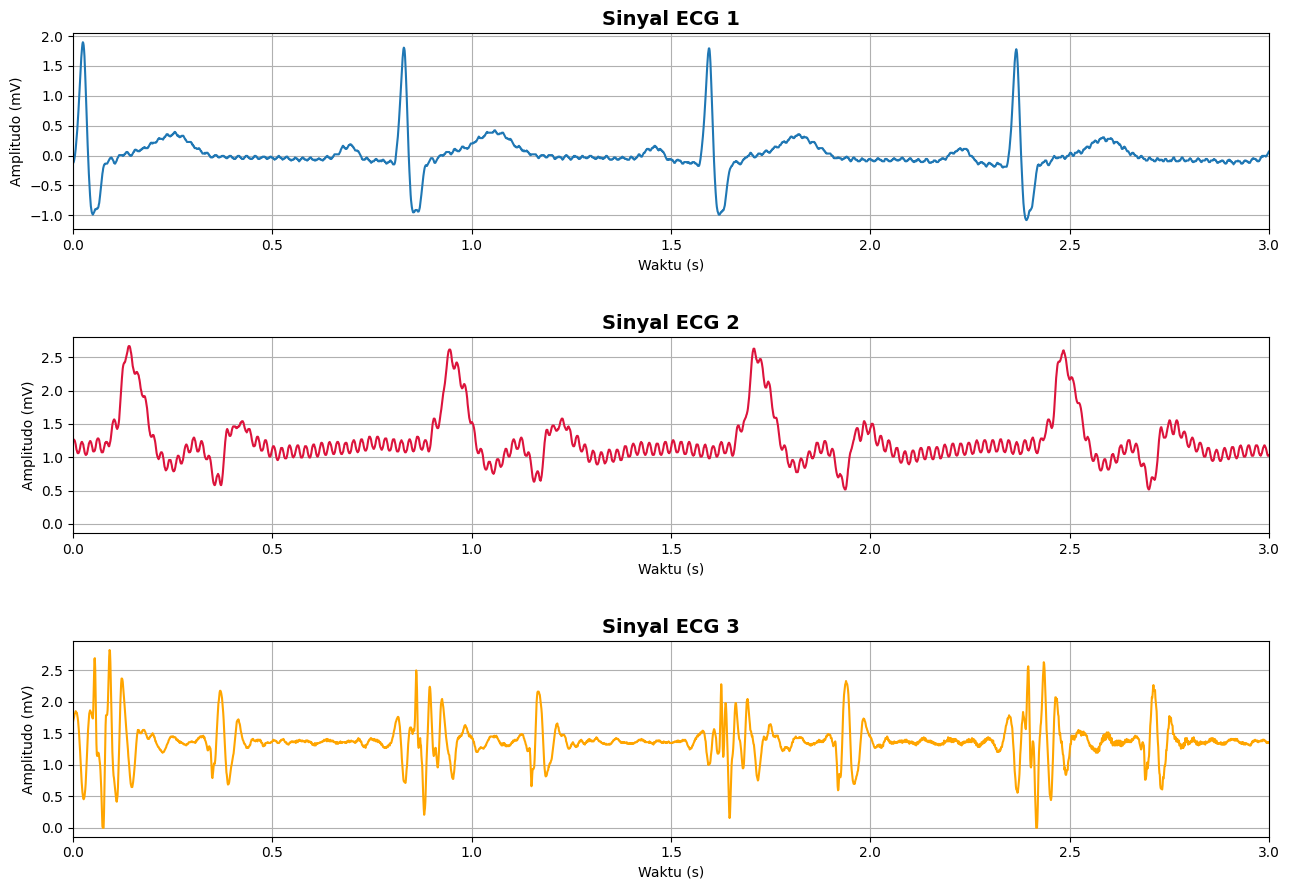

In [11]:
#windowing 
M=N 
w=np.zeros(N)
s1w=np.zeros(N)
s2w=np.zeros(N)
s3w=np.zeros(N)

for n in range(M-1):
    w[n]=1
for n in range (M):
    s1w[n]=s1[n]*w[n]
    s2w[n]=s2[n]*w[n]
    s3w[n]=S3[n]*w[n]

fig, axs = plt.subplots(3, figsize=(13,9))
axs[0].plot(t*0.001,s1w)
axs[0].set_title('Sinyal ECG 1',fontweight="bold", size=14)
axs[1].plot(t*0.001,s2w,'crimson')
axs[1].set_title('Sinyal ECG 2',fontweight="bold", size=14)
axs[2].plot(t*0.001,s3w,'orange')
axs[2].set_title('Sinyal ECG 3',fontweight="bold", size=14)
for ax in axs.flat:
    ax.set(xlabel='Waktu (s)',ylabel='Amplitudo (mV)', xlim=(0,3))
    ax.grid()
fig.tight_layout(h_pad=3)


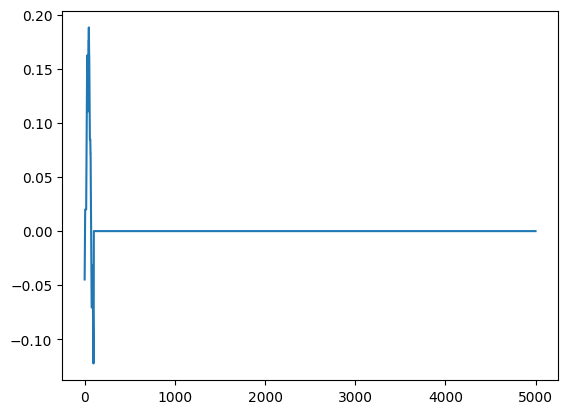

In [12]:
# mencari sinyal p
s1p = np.zeros(N)
s2p = np.zeros(N)
s3p = np.zeros(N)
A=0

#sinyal 1 
for n in range(N):
    if t[n]*0.001 < 0.65 or t[n]*0.001> 0.75 :
        s1p[n]=0
    else :
        s1p[A]=s1w[n]
        s1p[n]=0
        A=A+1

plt.plot(s1p)




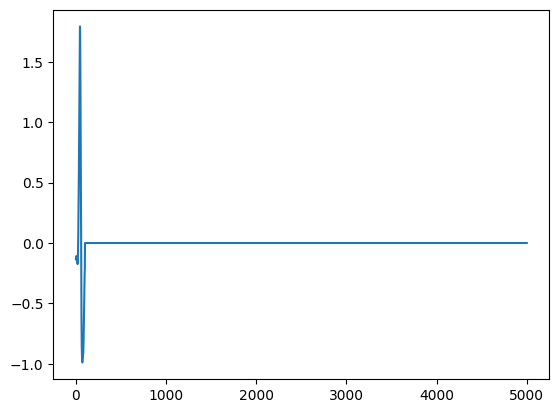

In [13]:
#mencari sinyal qrs
s1q = np.zeros(N)
s2q = np.zeros(N)
s3q = np.zeros(N)
A=0

#sinyal 1 
for n in range(N):
    if t[n]*0.001 < 1.55 or t[n]*0.001> 1.65 :
        s1q[n]=0
    else :
        s1q[A]=s1w[n]
        s1q[n]=0
        A=A+1

plt.plot(s1q)

In [14]:
#mencari sinyal t
s1t = np.zeros(N)
s2t = np.zeros(N)
s3t = np.zeros(N)
A=0

#sinyal 1 
for n in range(N):
    if t[n]*0.001 < 0.95 or t[n]*0.001> 1.2 :
        s1t[n]=0
    else :
        s1t[A]=s1w[n]
        s1t[n]=0
        A=A+1




In [15]:
#DFT sinyal p 
X_real1p = np.zeros(N)
X_imaj1p = np.zeros(N)
MagDFT1p = np.zeros(N) 

#DFT
for k in range(N):
    for n in range(N):
        X_real1p[k] += s1p[n]*np.cos(2*np.pi*k*n/N)
        X_imaj1p[k] -= s1p[n]*np.sin(2*np.pi*k*n/N)

for k in range(N):
    MagDFT1p[k] = np.sqrt(np.square(X_real1p[k]) + np.square(X_imaj1p[k])) 



In [16]:
#DFT sinyal QRS
X_real1q = np.zeros(N)
X_imaj1q = np.zeros(N)
MagDFT1q = np.zeros(N) 

#DFT
for k in range(N):
    for n in range(N):
        X_real1q[k] += s1q[n]*np.cos(2*np.pi*k*n/N)
        X_imaj1q[k] -= s1q[n]*np.sin(2*np.pi*k*n/N)

    
for k in range(N):
    MagDFT1q[k] = np.sqrt(np.square(X_real1q[k]) + np.square(X_imaj1q[k])) 




In [17]:
#DFT sinyal t
X_real1t = np.zeros(N)
X_imaj1t = np.zeros(N)
MagDFT1t = np.zeros(N) 

#DFT
for k in range(N):
    for n in range(N):
        X_real1t[k] += s1t[n]*np.cos(2*np.pi*k*n/N)
        X_imaj1t[k] -= s1t[n]*np.sin(2*np.pi*k*n/N)

    
for k in range(N):
    MagDFT1t[k] = np.sqrt(np.square(X_real1t[k]) + np.square(X_imaj1t[k])) 



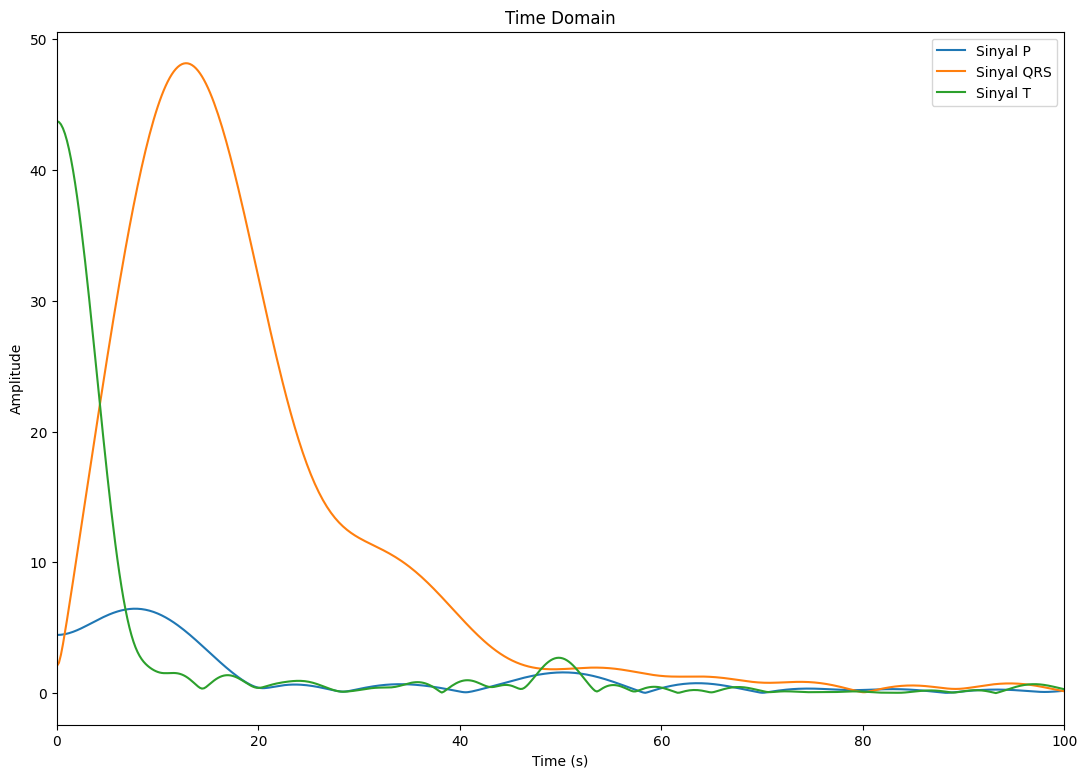

In [18]:
n = np.arange(0,N,1,dtype=int)
k = np.arange(0,N,1,dtype=int)     

plt.figure(figsize=((13,9)))
plt.plot(k*fs/N,MagDFT1p[n],label="Sinyal P")
plt.plot(k*fs/N,MagDFT1q[n],label="Sinyal QRS")
plt.plot(k*fs/N,MagDFT1t[n],label="Sinyal T")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Time Domain")
plt.legend()
plt.xlim(0,100)
plt.show()